# An Inference Circuit 
# (Tror ikke skal være her men i (11))

Normally, we would take a look at some learning algorithm, dissect it, and analyze the parts of it to see whether we can find a quantum algorithm that could accelerate that part of the learning protocol. But we can start thinking about learning problems the other way around. We can start from the hardware, looking at the particular quantum computer and what are the kind of things it can naturally do. So we are in this era where quantum computers are imperfect. So we have to factor in these imperfections. And if you look at the actual capabilities, we can develop completely new learning algorithms. So one of the first examples of this kind of thinking was a particular type of kernel for learning that can be executed on a shallow circuit gate model quantum computer. So in this case, we start with a very simple state preparation. And then the only thing we are going to do on this circuit is a Hadamard operation, which will allow us to do interference. So in the first two learning protocols that we looked at, we talked about how you can map a problem to an Ising model. In other words, we used a kind of a Hamiltonian encoding. In this case, we are going to use the amplitude encoding. So if we are given some vector in our data set, which we normalized to one, then we can encode it in the probability amplitudes in a superposition. And so then we have to be careful of how we actually prepare it. But for some data sets, this can be approximated well with shallow circuits. So given this encoding, we can start thinking about new kernels. So the kernel that we are going to calculate is exactly this one. It does not really have a classical analog. It's easy to calculate classically as well, but it's very natural to do on a gate model quantum computer. The shape of the kernel function is going to be something like this. So it's not like the exponential decay of the kernel that you saw in the previous video. It's slightly different, and it might be useful for certain kind of data sets. So the circuit that are going to need, assuming that our data set is only two dimensional, is the following. We have a data qubit. Every single data point is actually going to be included in this single qubit. So this superposition is going to be interesting. Then we have an ancilla qubit, which will be entangled with the test instance that we are trying to calculate the kernel and the data instances that we are given in a training set. Then we have an index qubit, which just keeps track of this index here. And then we have a class qubit, which will contain the label corresponding to a particular data instance. And the protocol is very, very simple. First, you have to prepare a state. The state looks a bit strange. So this is our amplitude encoded test instance, the one for which we're going to calculate the kernel. And here, we have our amplitude encoding data instances. Here's our index register. For bookkeeping, it's also here. Note that these are tensor product states. So these things are not really entangled here. And then we have the ancilla qubit. So the zero state of the ancilla qubit is entangled with the test instance, and the excited state, the one state of the ancilla, is entangled with our data instances. And then to finish it off, we also have the class qubit corresponding to the data instances. So we can think of it as a big black box that does all this preparation. Plus, we have some normalization constant to take care at, you know, this superposition is actually a quantum state. And what we are doing next is nothing but this Hadamard operation here. So since the zero state of the ancilla is entangled with the test state and the excited state is entangled with the data instances, by applying the Hadamard gate again on ancilla, you interfere the data instances with your test instance. So the state that you are going to get will have this form. It will have the test instance plus the data instance. And the test instance minus the data instance is encoded in these vectors. So that's the interference part. And now what we do is we do a measurement on the ancilla if you have a certain probability of success. So by success, I mean that the superposition collapses to this particular part. And based on this, if I forget the output one, then we just discard the result and run the circuit again. And if we get this result so we collapse it to this particular outcome, then we do a measurement in the class qubit as well. And the probability of getting certain results here, we create you exactly this kernel. So the point is that you repeatedly run this algorithm. Sometimes you succeed here. Then you measure here, and based on that, you can calculate this kernel, which could be interesting for a number of applications. 

• This protocol is attractive because the state preparation step does not include any entangling gates, and therefore it is easy to execute on contemporary quantum computers.

– False

• We are using amplitude encoding in this protocol. How many qubits would we need to encode four-dimensional vectors?

– 2

• If we had three data points, would a single-qubit index register still be sufficient?


# Probalistic Graphical Model

Deep learning excels at supervised learning, and it has also been making rapid advances in other programs of machine learning where there are tasks that remain intrinsically difficult to tackle by this paradigm. So there are a couple of problems which are more natural fit to other models-- for instance, probabilistic graphical models. So let's talk about these because as you will see, these can be trained and used efficiently by using quantum resources. So our primary interest is Markov networks. But to get there, let's go through a couple of things. So when we talk about machine learning, we can talk about discriminative problems where the task is this estimation of this conditional probability distribution. So for instance, given an image, tell me what's in the image. So this is where deep learning is excellent. A different task is to learn the actual probability distribution of your data instances, the underlying manifold, or the joint probability distribution with some label. These are hard problems. And there are a couple of instances where you can do this by deep learning, but there are others where you cannot. And probabilistic graphical models are very good at capturing the sparsity structure between random variables. And that way, they model these probability distributions. There are two main types of probabilistic graphical models-- one that the underlying graph is directed. These are called Bayesian networks. So for instance, if you have an observation that your grass is wet, and you have two other random variables which one says that sprinkler was on or off and the other one whether it was raining, then you can make backward inference and ask, hey, given that the grass is wet, what's the probability that it was raining? These are the kind of queries that would be difficult to solve by a neural network. The other large class is called Markov networks, which are undirected. So there's no implication for any kind of causation or direction of causation. So in this case, for instance, we can have three patients who have a certain kind of disease. And we don't know how they infected each other, but we knew that there was some infection pattern going on. So again, we can analyze the network and make statements. So let's take a look how this sparse modeling happens. So what we are after is conditional independence. So we call two random variables conditional independent given a third random variable if you can factorize this joint probability distribution of x and y given z into individual parts, so it could be just px given z and py given z. It doesn't mean that they are independent, but conditioned on this third random variable, they are independent. So for instance, given four random variables, x1 is conditionally independent from x3 and x4 given x2. So this graph, this undirected graph, captures this independent structure or the remaining dependencies. And it turns out that what you can do is define energy functions on the clicks of this graph. So for instance, this is a K1, which means a complete graph on a single node, which is just the node itself, and say that if it takes the value 1, it has some certain energy. And if it takes the value 0, then it has a different energy. Then you can assign some energy value also to configurations over K2's or two nodes that contain an edge or that are connected by an edge. And you see that there's also a K2 here and another one here and another one here. So here, you have a total of four K2's. And finally, you also have this triangle, which is a complete graph on three nodes. It's a click of size 3. And your probability distribution factorizes over these clicks. So as long as you can define an energy function that could model your probability distribution over these clicks, you can describe the full joint probability distribution. And this should look familiar because this has a very similar structure to the thermal state, the state that we get after equilibration in an open quantum system or what we can approximate by the quantum approximate thermalization protocol. In fact, under very mild assumptions, there's a correspondence between Markov networks and the probability distributions they can describe and Boltzmann distributions. And there are a couple of special cases. So when you think about it, the Ising model is a special case. So in this case, our binary-- our random variables are all binary. And we only have K2's. We don't have K3's. And a special case of Ising models and hence Markov networks are Boltzmann machines. Here, you partition your Ising spins into two categories-- one I call the visible ones, and others I called hidden ones. And what you do is you define the same energy function as you would do for an ordinary Markov network. But you're only interested in reproducing some probability distribution here on the visible nodes. So the hidden nodes that only there to help you mitigate correlations between these random variables. So you marginalize out over the hidden nodes to get a probability distribution that you are interested in. These are very powerful methods, and they're expensive to train on classical computers. So this is one area where quantum computers can help. 

• A discriminative learning model essentially estimates a conditional probability distribution 𝑝(𝑦|𝑥) , whereas a generative model approximates the joint probability distribution 𝑝(𝑥,𝑦) . Why is it harder to learn a generative model?

– The output of the learner has the same dimension as the input space, making it harder to create a concise representation.

• What's the largest clique size in the following Markov network? 
# GFX!!!??

– 3

• What's the maximum clique size in a restricted Boltzmann machine? The restricted Boltzmann machine is the one you see in the video, with no edges within the visible set or the hidden set of nodes.

– 2


The roots of probabilistic graphical models go back to the 1980s, with a strong connection to Bayesian statistics. The story resembles that of neural networks: they have been around for over three decades and they need massive computational power. However, unlike in the case of deep learning, the requirements for computational resources remain out of reach. These models require sampling a distribution, and very often it is the Boltzmann distribution. Since quantum computers can give samples from this distribution, we can hope that quantum hardware can enable these models the same way graphics processing units enabled deep learning.

# Probabilistic graphical models

Probabilistic graphical models capture a compact representation of a joint probability distribution. For $\{X_1,\ldots,X_N\}$ binary random variables, there are $2^N$ assignments. In a graphical model, complexity is dealt with through graph theory. We get both an efficient treatment of uncertainty (probabilities) and of logical structure (independence constraints). The factorization of the probabilities happens along conditional independences among random variables. The definition is that $X$ is conditionally independent of $Y$ given $Z$ $(X\perp Y|Z)$, if $P(X=x, Y=y|Z=z) = P(X=x|Z=z)P(Y=y|Z=z)$ for all $x\in X,y\in Y,z\in Z$.

The graph can be directed -- these are called Bayesian networks in general -- or undirected, in the case of Markov networks (also known as Markov random fields) [[1](#1)]. Graphical models are quintessentially generative: we explicitly model a probability distribution. Thus generating new samples is trivial and we can always introduce extra random variables to ensure certain properties. These models also take us a step closer to explainability, either by the use of the random variables directly for explanations (if your model is such) or by introducing explanatory random variables that correlate with the others.

In a Markov random field, we can allow cycles in the graph and switch from local normalization (conditional probability distribution at each node) to global normalization of probabilities (i.e. a partition function). Examples include countless applications in computer vision, pattern recognition, artificial intelligence, but also Ising models that we have seen before: the factors are defined as degree-1 and degree-2 monomials of the random variables connected in the graph.

The factorization is given as a sum $P(X_1, \ldots, X_N) = \frac{1}{Z}\exp(-\sum_k E[C_k])$, where $C_k$ are are cliques of the graph, and $E[.]$ is an energy defined over the cliques. If $P$ is a Boltzmann distribution over $G$, all local Markov properties will hold. The other way also holds if $P$ is a positive distribution.

Let us define a Markov field of binary variables. This will be an Ising model over three nodes. This will contain three cliques of a single node (the on-site fields) and two cliques of two nodes: the edges that connect the nodes.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dimod

n_spins = 3
h = {v: 1 for v in range(n_spins)}
J = {(0, 1): 2,
     (1, 2): -1}
model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)
sampler = dimod.SimulatedAnnealingSampler()

The probability distribution of a configuration $P(X_1, \ldots, X_N) = \frac{1}{Z}\exp(-\sum_k E[C_k])$ does not explicitly define the temperature, but it is implicitly there in the constants defining the Hamiltonian. So, for instance, we can scale it by a temperature $T=1$.

Let's now find out the probability $P(E)$ of each energy level $E$. It can be expressed as a sum over all the states with energy $E$: $P(E)=\sum_{E(X_1,...,X_n)=E} P(X_1,...,X_N)=\sum_{E(X_1,...,X_n)=E} \frac{1}{Z}e^{-E/T}$. The term in the sum is constant (it doesn't depend on $X_1,...,X_N$ anymore). Therefore, we just need to count the number of states such that $E(X_1,...,X_n)=E$. This number is called the *degeneracy* of the energy level $E$, and often noted $g(E)$. Hence, we have $P(E)=\frac{1}{Z} g(E) e^{-E/T}$.

Let's extract this probability for the particular case of our model.

Degeneracy {-4.0: 1, -2.0: 3, 0.0: 1}


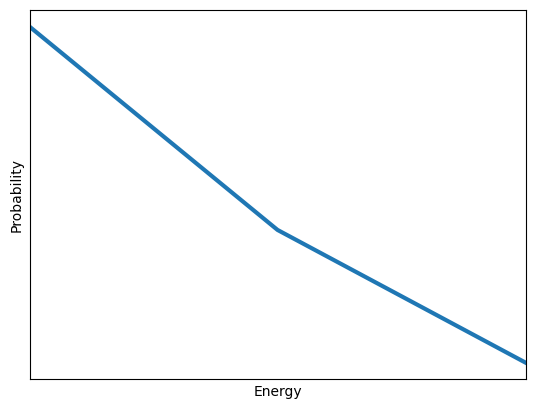

In [2]:
temperature = 1
response = sampler.sample(model, beta_range=[1/temperature, 1/temperature], num_reads=100)

g = {} # dictionary that associate to each energy E the degeneracy g[E]
for solution in response.aggregate().data():
    if solution.energy in g.keys():
        g[solution.energy] += 1
    else:
        g[solution.energy] = 1
print("Degeneracy", g)
probabilities = np.array([g[E] * np.exp(-E/temperature) for E in g.keys()])
Z = probabilities.sum()
probabilities /= Z
fig, ax = plt.subplots()
ax.plot([E for E in g.keys()], probabilities, linewidth=3)
ax.set_xlim(min(g.keys()), max(g.keys()))
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Energy')
ax.set_ylabel('Probability')
plt.show()

# Optimization and Sampling PGMs

We introduced probabilistic graphical models and Markov networks in particular. And now let's take a look at what other kind of queries that you can ask from these networks. The easiest query that you can run is called the most probable explanation. In this case, you have some evidence you observe some of your random variables. For instance, these two random variables would consist the set which belong to the evidence. For instance, this random variable takes the value one, and this takes the value zero. And then the question you are asking is that given this evidence, what's the most likely configuration for the rest of the network? So you are looking for the arg max of the remaining variables in the graph. Then the second one, and somewhat more complicated one, is when you are, again, given the evidence-- so you clamp some of these random variables. But you're not interested in the configuration of all of the remaining random variables. So for instance, you are not interested in what this one is doing. So you're are only interested in just some subset. So you marginalize over those variables that you're not interested in, and you're only looking for an optimal configuration over a subset that you are interested in. So think about things like having a probability distribution describing different symptoms and their correlations. And you have a patient, then you observe a couple of those symptoms but not others. Then you can run a query to find out all the other symptoms that you shouldn't be looking for assuming that the person has a certain kind of disease. And the main thing here is that even if you train the network and it reproduces the probability distribution that you're interested in, running these queries is still computationally very difficult. In fact, most of these problems are at least np hard. When you think about deep learning, once you train the network, running an inference step is relatively inexpensive. You can run it on a cell phone in many cases. Whereas here, even inference, using the model, remains hard. So if you can give some advantage by using quantum resources, that's extremely valuable. So given that the problem is hard, there are a couple of ways of dealing with it. One of the ways of dealing with it is using approximate inference. So instead of solving it accurately, you run some sampling over possible outcomes. And then you have a digital computer, that's deterministic. You actually fake randomness. And you fake sampling from a probability distribution by methods which are typically Markov chain Monte Carlo methods which have their own problems. They take time to burn in, and samples can be correlated. And first and foremost, they take a lot of computational time. But then remember that the probability distribution is just this. It factorizes a Boltzmann distribution. So if you can set an Ising model, then we can just use a quantum computer to do approximate inference for us. And you have options. So if you have a quantum annealer and you have a fair number of qubits and your task is to estimate the effective temperature of the system, so you can rescale these energy values according to what the hardware is actually executing. So there is this extra step that you have to do. Or you can run the gate model quantum approximate thermalization protocol, which needs an ancilla system, which means that you have to use a lot more qubits than what you are just actually interested in. And then on a smaller scale, well, that's an option too. Whichever method you choose, you can accelerate some of these Markov networks at training and also during inference. 

• Markov chain Monte Carlo methods give you a way to sample a probability distribution. What are some of their common drawbacks?

– (Answer Incorrect: True randomness requires purpose-built hardware in classical computers. There is vast literature on how to sample arbitrary distributions with these methods. If you pull out samples from the same chain one after the othr, there will be correlations between them. Submit)

– (Answer Incorrect:True randomness requires purpose-built hardware in classical computers. Markov chains have a burn-in time before you can sample them.

– They use pseudo random number generators on classical computers.

– They can be computationally demanding.

– Samples can be correlated.

• If you have a problem that have two solutions with equal energy (implying equal probability), are they in general equally likely to reach with Monte Carlo methods? Remember that the configuration of random variables for the same energy level can be very different.

– False

• Are the samples going to be correlated if they come from a quantum device?

– No

In this case, the conditional independences are already encapsulated by the model: for instances, spins 0 and 2 do not interact. In general, it is hard to learn the structure of a probabilistic graphical given a set of observed correlations in the sample $S$. We can only rely on heuristics. The typical way of doing it is to define a scoring function and do some heuristic global optimization. 

Once we identified or defined the graph structure $G$, we have to learn the probabilities in the graph. We again rely on our sample and its correlations, and use a maximum likelihood or a maximum a posteriori estimate of the corresponding parameters $\theta_G$ with the likelihood $P(S|\theta_G)$. This is again a hard problem.

Applying the learned model means probabilistic inference to answer queries of the following types:

-   Conditional probability: $P(Y|E=e)=\frac{P(Y,e)}{P(e)}$.

-   Maximum a posteriori:
    $\mathrm{argmax}_y P(y|e)=\mathrm{argmax}_y \sum_Z P(y, Z|e)$.

This problem is in \#P. Contrast this to deep learning: once the neural network is trained, running a prediction on it is relatively cheap. In the case of probabilistic graphical models, inference remains computationally demanding even after training the model. Instead of solving the inference problem directly, we use approximate inference with sampling, which is primarily done with Monte Carlo methods on a classical computer. These have their own problems of slow burn-in time and correlated samples, and this is exactly the step we can replace by sampling on a quantum computer.

For instance, let us do a maximum a posteriori inference on our Ising model. We clamp the first spin to -1 and run simulated annealing for the rest of them to find the optimal configuration. We modify the simulated annealing routine in `dimod` to account for the clamping.

In [3]:
from dimod.reference.samplers.simulated_annealing import greedy_coloring

clamped_spins = {0: -1}
num_sweeps = 1000
βs = [1.0 - 1.0*i / (num_sweeps - 1.) for i in range(num_sweeps)]

# Set up the adjacency matrix.
adj = {n: set() for n in h}
for n0, n1 in J:
    adj[n0].add(n1)
    adj[n1].add(n0)
# Use a vertex coloring for the graph and update the nodes by color
__, colors = greedy_coloring(adj)

spins = {v: np.random.choice((-1, 1)) if v not in clamped_spins else clamped_spins[v]
         for v in h}
for β in βs:
    energy_diff_h = {v: -2 * spins[v] * h[v] for v in h}

    # for each color, do updates
    for color in colors:
        nodes = colors[color]
        energy_diff_J = {}
        for v0 in nodes:
            ediff = 0
            for v1 in adj[v0]:
                if (v0, v1) in J:
                    ediff += spins[v0] * spins[v1] * J[(v0, v1)]
                if (v1, v0) in J:
                    ediff += spins[v0] * spins[v1] * J[(v1, v0)]

            energy_diff_J[v0] = -2. * ediff
        for v in filter(lambda x: x not in clamped_spins, nodes):
            logp = np.log(np.random.uniform(0, 1))
            if logp < -1. * β * (energy_diff_h[v] + energy_diff_J[v]):
                spins[v] *= -1

Running this algorithm, we can obtain the most likely configuration:

In [4]:
spins

{0: -1, 1: -1, 2: 1}

# Se igjen i lyx (Husk implementering og plots)

Deep learning excels at supervised learning, and it has also been making rapid advances in other programs of machine learning where there are tasks that remain intrinsically difficult to tackle by this paradigm. So there are a couple of problems which are more natural fit to other models-- for instance, probabilistic graphical models. So let's talk about these because as you will see, these can be trained and used efficiently by using quantum resources. So our primary interest is Markov networks. But to get there, let's go through a couple of things. So when we talk about machine learning, we can talk about discriminative problems where the task is this estimation of this conditional probability distribution. So for instance, given an image, tell me what's in the image. So this is where deep learning is excellent. A different task is to learn the actual probability distribution of your data instances, the underlying manifold, or the joint probability distribution with some label. These are hard problems. And there are a couple of instances where you can do this by deep learning, but there are others where you cannot. And probabilistic graphical models are very good at capturing the sparsity structure between random variables. And that way, they model these probability distributions. There are two main types of probabilistic graphical models-- one that the underlying graph is directed. These are called Bayesian networks. So for instance, if you have an observation that your grass is wet, and you have two other random variables which one says that sprinkler was on or off and the other one whether it was raining, then you can make backward inference and ask, hey, given that the grass is wet, what's the probability that it was raining? These are the kind of queries that would be difficult to solve by a neural network. The other large class is called Markov networks, which are undirected. So there's no implication for any kind of causation or direction of causation. So in this case, for instance, we can have three patients who have a certain kind of disease. And we don't know how they infected each other, but we knew that there was some infection pattern going on. So again, we can analyze the network and make statements. So let's take a look how this sparse modeling happens. So what we are after is conditional independence. So we call two random variables conditional independent given a third random variable if you can factorize this joint probability distribution of x and y given z into individual parts, so it could be just px given z and py given z. It doesn't mean that they are independent, but conditioned on this third random variable, they are independent. So for instance, given four random variables, x1 is conditionally independent from x3 and x4 given x2. So this graph, this undirected graph, captures this independent structure or the remaining dependencies. And it turns out that what you can do is define energy functions on the clicks of this graph. So for instance, this is a K1, which means a complete graph on a single node, which is just the node itself, and say that if it takes the value 1, it has some certain energy. And if it takes the value 0, then it has a different energy. Then you can assign some energy value also to configurations over K2's or two nodes that contain an edge or that are connected by an edge. And you see that there's also a K2 here and another one here and another one here. So here, you have a total of four K2's. And finally, you also have this triangle, which is a complete graph on three nodes. It's a click of size 3. And your probability distribution factorizes over these clicks. So as long as you can define an energy function that could model your probability distribution over these clicks, you can describe the full joint probability distribution. And this should look familiar because this has a very similar structure to the thermal state, the state that we get after equilibration in an open quantum system or what we can approximate by the quantum approximate thermalization protocol. In fact, under very mild assumptions, there's a correspondence between Markov networks and the probability distributions they can describe and Boltzmann distributions. And there are a couple of special cases. So when you think about it, the Ising model is a special case. So in this case, our binary-- our random variables are all binary. And we only have K2's. We don't have K3's. And a special case of Ising models and hence Markov networks are Boltzmann machines. Here, you partition your Ising spins into two categories-- one I call the visible ones, and others I called hidden ones. And what you do is you define the same energy function as you would do for an ordinary Markov network. But you're only interested in reproducing some probability distribution here on the visible nodes. So the hidden nodes that only there to help you mitigate correlations between these random variables. So you marginalize out over the hidden nodes to get a probability distribution that you are interested in. These are very powerful methods, and they're expensive to train on classical computers. So this is one area where quantum computers can help. 

• A discriminative learning model essentially estimates a conditional probability distribution 𝑝(𝑦|𝑥) , whereas a generative model approximates the joint probability distribution 𝑝(𝑥,𝑦) . Why is it harder to learn a generative model?

– The output of the learner has the same dimension as the input space, making it harder to create a concise representation.

• What's the largest clique size in the following Markov network? 
# Se bildet grafen på lyx

– 3

• What's the maximum clique size in a restricted Boltzmann machine? The restricted Boltzmann machine is the one you see in the video, with no edges within the visible set or the hidden set of nodes.

– 2


# Boltzmann machines

A Boltzmann machine generates samples from a probability distributition $P(\textbf{v})$ inferred from the data, where $\textbf{v} \in \{0,1\}^n$. The assumption is that this distribution lies on a latent space that can be paramerized by a set of hidden variables $\textbf{h} \in \{0,1\}^n$, such that $P(\textbf{v})=\sum_h P(\textbf{v}|\textbf{h})P(\textbf{h})$. The joint probability distribution is modeled as a Gibbs distribution with the energy defined by an Ising Model: $P(\textbf{v}, \textbf{h})=\frac{1}{Z} e^{-\beta E(\textbf{h},\textbf{v})}$ and $E(\textbf{h},\textbf{v})=-\sum_{i,j} W_{ij} h_i v_j$. It can then be shown that $p(\textbf{h}|\textbf{v})=\sigma(W \cdot \textbf{v})$ and $p(\textbf{v}|\textbf{h})=\sigma(W \cdot \textbf{h})$, where $\sigma$ is the sigmoid function defined by $\sigma(x)=\frac{1}{1+e^{-x}}$.

To train a Boltzmann machine, we look for the weights $W$ that maximizes the log-likelihood $L=\sum_{\textbf{v} \in S} \log(p(\textbf{v}|W))$, where $S$ is the training set. This function can be optimized using regular gradient ascent: $W_{ij}^{(t+1)}=W_{ij}^{(t)} + \eta \frac{\partial L}{\partial W_{ij}}$. Computing the gradient $\frac{\partial L}{\partial W_{ij}}$ is the hard part. Indeed, we can show that 

$$\frac{\partial L}{\partial W_{ij}}=\frac{1}{|S|} \sum_{\textbf{v} \in S} \mathbb{E}_{\textbf{h} \sim P(\textbf{h}|\textbf{v})}[h_i v_j] - \mathbb{E}_{(\textbf{h},\textbf{v}) \sim P(\textbf{h},\textbf{v})}[h_i v_j]$$.

The first expectation value is easy to compute: it is equal to $\sigma \left( \sum_j W_{ij} v_j \right) v_j$. We only need to sum those expectation values over the dataset. This is called the positive phase, after its positive sign in the gradient.

The second expectation value cannot be simplified as easily, since it is taken over all possible configuration $\textbf{v}$ and $\textbf{h}$. It would take an exponential amount of time to compute it exactly. We can use the exact same quantum sampling method as above to outsource this part of the calculation to a quantum processing unit and train Boltzmann machines.

# References

[1] Koller, D., Friedman, N., Getoor, L., Taskar, B. (2007). [Graphical Models in a Nutshell](https://ai.stanford.edu/~koller/Papers/Koller+al:SRL07.pdf). In *Introduction to Statistical Relational Learning*, MIT Press. <a id='1'></a>

# SE EKSAMEN!!!